<font size="+3"><strong>1.3. Exploratory Data Analysis </strong></font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

After importing, the next step in many data science projects is exploratory data analysis (EDA), where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.

<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

# Import Data

**Task 1.3.1:** Read the CSV file that you created in the last notebook (`"../small-data/mexico-real-estate-clean.csv"`) into a DataFrame named `df`. Be sure to check that all your columns are the correct data type before you go to the next task.

In [3]:
# Import "data/mexico-real-estate-clean.csv"
df = pd.read_csv("C:/Users/STEVE/OneDrive/Desktop/PYTHON/Housing_in_Mexico/data/mexico-reai-estate-clean.csv", encoding='latin1')

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (1736, 7)


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,5,house,Yucatán,21.052583,-89.538639,205,105191.37


While there are only two `dtypes` in our DataFrame (`object` and `float64`), there are three categories of  data: location, categorical, and numeric. Each of these require a different kind of exploration in our analysis. 

# Location Data: `"lat"` and `"lon"`

hey say that the most important thing in real estate is location, and we can see where where in Mexico our houses are located by using the `"lat"` and `"lon"` columns. Since latitude and longitude are based on a coordinate system, a good way to visualize them is to create a scatter plot on top of a map. A great tool for this is the [`scatter_mapbox`](https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html) from the plotly library.

**Task 1.3.2:** Add `"lat"` and `"lon"` to the code below, and run the code. You'll see a map that's centered on Mexico City, and you can use the "Zoom Out" button in the upper-right corner of the map so that you can see the whole country.

In [12]:
# Use plotly express to create figure
fig = px.scatter_map(
    df,  # Our DataFrame
    lat='lat',
    lon='lon',
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

Looking at this map, are the houses in our dataset distributed evenly throughout the country, or are there states or regions that are more prevalent? Can you guess where Mexico's biggest cities are based on this distribution?

# Categorical Data: `"state"`

Even though we can get a good idea of which states are most common in our dataset from looking at a map, we can also get the exact count by using the `"state"` column. 

**Task 1.3.3:** Use the [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) method on the `"state"` column to determine the 10 most prevalent states in our dataset.

In [13]:
# Get value counts of "state" column
df["state"].value_counts().head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
Chiapas                             55
Name: count, dtype: int64

# Numerical Data: `"area_m2"` and `"price_usd"`

We have a sense for where the houses in our dataset are located, but how much do they cost? How big are they? The best way to answer those questions is looking at descriptive statistics.

**Task 1.3.4:** Use the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to print the mean, standard deviation, and quartiles for the `"area_m2"` and `"price_usd"` columns.

In [14]:
# Describe "area_m2", "price_usd" columns
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


Let's start by looking at `"area_m2"`. It's interesting that the mean is larger than the median (another name for the 50% quartile). Both of these statistics are supposed to give an idea of the "typical" value for the column, so why is there a difference of almost 15 m<sup>2</sup> between them? To answer this question, we need to see how house sizes are distributed in our dataset. Let's look at two ways to visualize the distribution: a histogram and a boxplot.

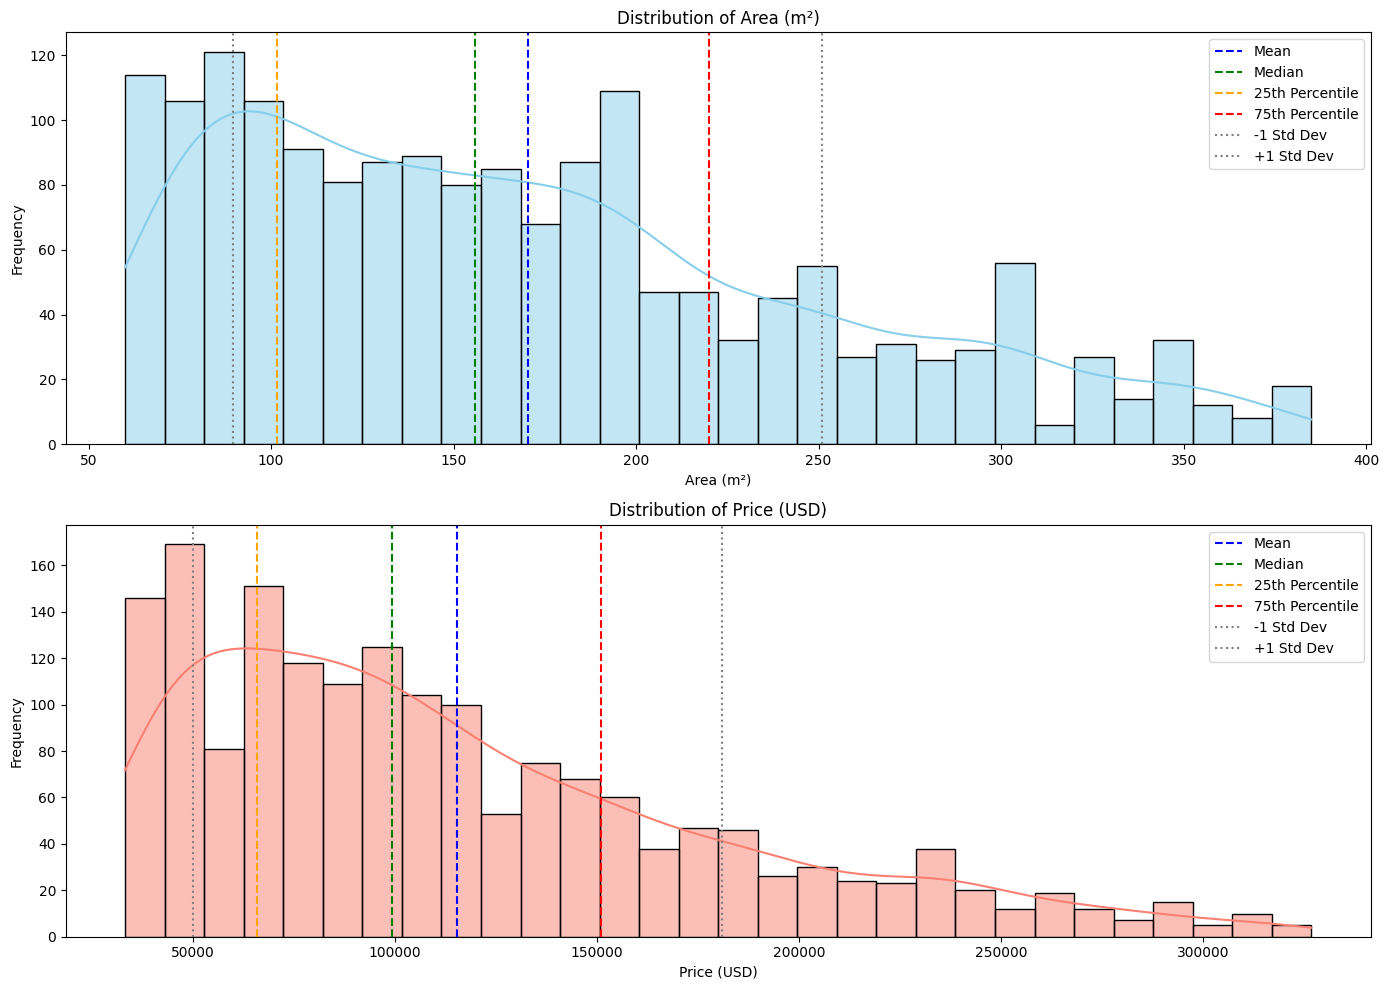

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot area_m2 distribution
sns.histplot(df["area_m2"], kde=True, ax=axes[0], color='skyblue', bins=30)
axes[0].axvline(df["area_m2"].mean(), color='blue', linestyle='--', label='Mean')
axes[0].axvline(df["area_m2"].median(), color='green', linestyle='--', label='Median')
axes[0].axvline(df["area_m2"].quantile(0.25), color='orange', linestyle='--', label='25th Percentile')
axes[0].axvline(df["area_m2"].quantile(0.75), color='red', linestyle='--', label='75th Percentile')
axes[0].axvline(df["area_m2"].mean() - df["area_m2"].std(), color='gray', linestyle=':', label='-1 Std Dev')
axes[0].axvline(df["area_m2"].mean() + df["area_m2"].std(), color='gray', linestyle=':', label='+1 Std Dev')
axes[0].set_title('Distribution of Area (m²)')
axes[0].set_xlabel('Area (m²)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot price_usd distribution
sns.histplot(df["price_usd"], kde=True, ax=axes[1], color='salmon', bins=30)
axes[1].axvline(df["price_usd"].mean(), color='blue', linestyle='--', label='Mean')
axes[1].axvline(df["price_usd"].median(), color='green', linestyle='--', label='Median')
axes[1].axvline(df["price_usd"].quantile(0.25), color='orange', linestyle='--', label='25th Percentile')
axes[1].axvline(df["price_usd"].quantile(0.75), color='red', linestyle='--', label='75th Percentile')
axes[1].axvline(df["price_usd"].mean() - df["price_usd"].std(), color='gray', linestyle=':', label='-1 Std Dev')
axes[1].axvline(df["price_usd"].mean() + df["price_usd"].std(), color='gray', linestyle=':', label='+1 Std Dev')
axes[1].set_title('Distribution of Price (USD)')
axes[1].set_xlabel('Price (USD)')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Final layout
plt.tight_layout()
plt.show()


In [17]:
import plotly.graph_objects as go
import pandas as pd

# Plot for area_m2
fig_area = go.Figure()

# Histogram
fig_area.add_trace(go.Histogram(
    x=df["area_m2"],
    nbinsx=30,
    name='Area (m²)',
    marker_color='skyblue',
    opacity=0.7
))

# Add vertical lines for summary statistics
stats = {
    'Mean': df["area_m2"].mean(),
    'Median': df["area_m2"].median(),
    '25th Percentile': df["area_m2"].quantile(0.25),
    '75th Percentile': df["area_m2"].quantile(0.75),
    '-1 Std Dev': df["area_m2"].mean() - df["area_m2"].std(),
    '+1 Std Dev': df["area_m2"].mean() + df["area_m2"].std(),
}

for name, val in stats.items():
    fig_area.add_trace(go.Scatter(
        x=[val, val],
        y=[0, 100],  # You can adjust the max height accordingly
        mode="lines",
        name=name,
        line=dict(dash="dash"),
        hovertemplate=f"{name}: {val:.2f}<extra></extra>"
    ))

fig_area.update_layout(
    title="Interactive Distribution of Area (m²)",
    xaxis_title="Area (m²)",
    yaxis_title="Count",
    bargap=0.1,
    hovermode="x unified"
)

fig_area.show()


In [18]:
# Plot for price_usd
fig_price = go.Figure()

fig_price.add_trace(go.Histogram(
    x=df["price_usd"],
    nbinsx=30,
    name='Price (USD)',
    marker_color='salmon',
    opacity=0.7
))

# Add vertical lines for price statistics
price_stats = {
    'Mean': df["price_usd"].mean(),
    'Median': df["price_usd"].median(),
    '25th Percentile': df["price_usd"].quantile(0.25),
    '75th Percentile': df["price_usd"].quantile(0.75),
    '-1 Std Dev': df["price_usd"].mean() - df["price_usd"].std(),
    '+1 Std Dev': df["price_usd"].mean() + df["price_usd"].std(),
}

for name, val in price_stats.items():
    fig_price.add_trace(go.Scatter(
        x=[val, val],
        y=[0, 100],  # Adjust this height as needed
        mode="lines",
        name=name,
        line=dict(dash="dash"),
        hovertemplate=f"{name}: {val:,.2f}<extra></extra>"
    ))

fig_price.update_layout(
    title="Interactive Distribution of Price (USD)",
    xaxis_title="Price (USD)",
    yaxis_title="Count",
    bargap=0.1,
    hovermode="x unified"
)

fig_price.show()


### Implications for Data Science

#### 1. Modeling: Handle Skewness
     Issue: price_usd and area_m2 are right-skewed, meaning most values are concentrated at the lower end, with long tails of high values.

    Impact: Skewness can distort linear models, regression coefficients, and model assumptions (e.g., normally distributed residuals).

✅ Action:

In [19]:
import numpy as np
df["log_price_usd"] = np.log(df["price_usd"])
df["log_area_m2"] = np.log(df["area_m2"])


##### Distribution Before and After Log Transformation

In [ ]:
# Apply log transformation
df["log_price_usd"] = np.log(df["price_usd"])
df["log_area_m2"] = np.log(df["area_m2"])

# Plot side-by-side
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Price
sns.histplot(df["price_usd"], bins=30, ax=axes[0, 0], color="salmon")
axes[0, 0].set_title("Original Price Distribution")

sns.histplot(df["log_price_usd"], bins=30, ax=axes[0, 1], color="skyblue")
axes[0, 1].set_title("Log-Transformed Price Distribution")

# Area
sns.histplot(df["area_m2"], bins=30, ax=axes[1, 0], color="orange")
axes[1, 0].set_title("Original Area Distribution")

sns.histplot(df["log_area_m2"], bins=30, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Log-Transformed Area Distribution")

plt.tight_layout()
plt.show()


Use `log_price_usd` and `log_area_m2` in linear models like `LinearRegression`, or even for better scaling in tree-based models.

#### 2. Segmentation: Market Categories
Idea: Use quartiles to define market segments.

Example:

`Q1` (< 25%): Low-end

`Q2`–Q3: Mid-range

`Q4` (> 75%): High-end

In [20]:
df["price_segment"] = pd.qcut(df["price_usd"], q=4, labels=["Low", "Lower-Mid", "Upper-Mid", "High"])

##### Price Segments using Quartiles (Boxplot + Stripplot)

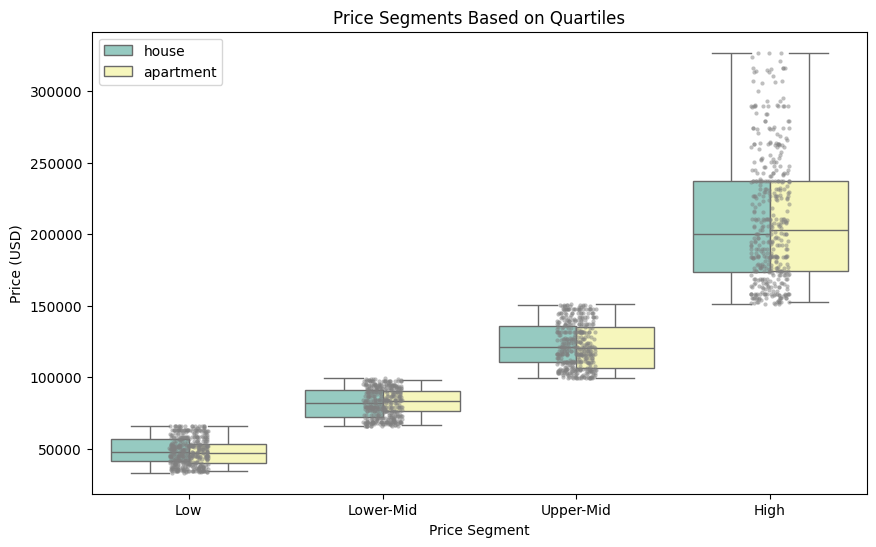

In [45]:
# Segment prices
df["price_segment"] = pd.qcut(df["price_usd"], q=4, labels=["Low", "Lower-Mid", "Upper-Mid", "High"])

# Visualize with boxplot and stripplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="price_segment", y="price_usd", hue="property_type", data=df, palette="Set3")
sns.stripplot(x="price_segment", y="price_usd", data=df, color='gray', size=3, jitter=True, alpha=0.5)
plt.title("Price Segments Based on Quartiles")
plt.ylabel("Price (USD)")
plt.xlabel("Price Segment")
plt.show()



#### 3. Feature Engineering: Price per m²
    Why: Helps normalize pricing across different property sizes.

In [21]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

This is especially useful in:

    Regression models

    Comparing regions or property types

    Standardizing across variable property sizes

#### 4. Anomaly Detection: Identify Outliers
    Goal: Detect extremely expensive or large properties that may skew models or signal rare cases.

    ✅ Action Options:

        Z-Score:

In [ ]:
from scipy.stats import zscore
df["z_price"] = zscore(df["price_usd"])
df_outliers = df[df["z_price"].abs() > 3]  # 3 is a common threshold

IQR Method:

In [24]:
Q1 = df["price_usd"].quantile(0.25)
Q3 = df["price_usd"].quantile(0.75)
IQR = Q3 - Q1
df_outliers = df[(df["price_usd"] < Q1 - 1.5 * IQR) | (df["price_usd"] > Q3 + 1.5 * IQR)]

##### Outlier Detection: IQR vs Z-Score

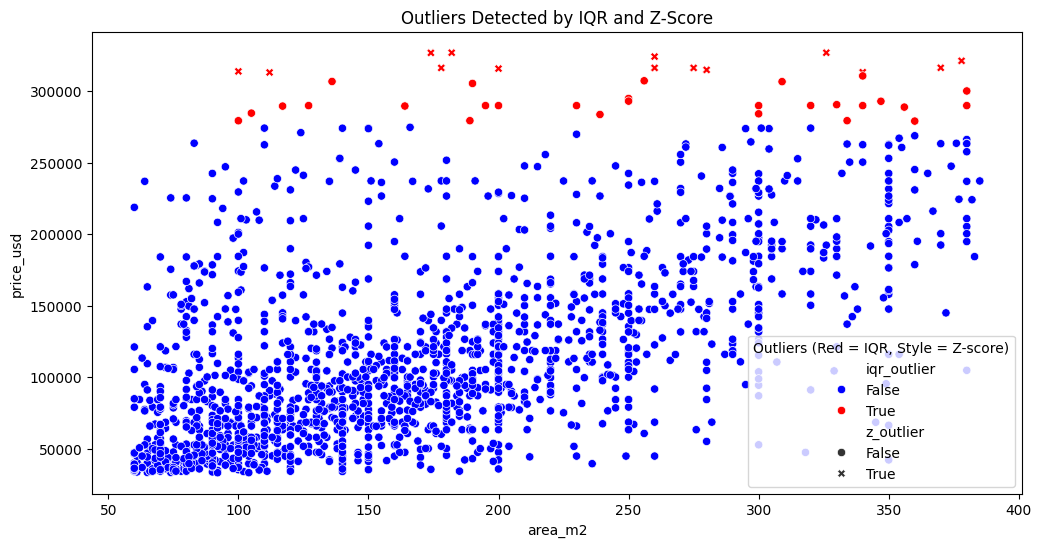

In [43]:
# Z-score outliers
df["z_price"] = zscore(df["price_usd"])
df["z_outlier"] = (df["z_price"].abs() > 3)

# IQR outliers
Q1 = df["price_usd"].quantile(0.25)
Q3 = df["price_usd"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["iqr_outlier"] = ~df["price_usd"].between(lower_bound, upper_bound)

# Plot both
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="area_m2", y="price_usd", hue="iqr_outlier", style="z_outlier", palette={False: "blue", True: "red"})
plt.title("Outliers Detected by IQR and Z-Score")
plt.legend(title="Outliers (Red = IQR, Style = Z-score)")
plt.show()


**Task 1.3.5:** Create a histogram of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Sizes"`. 

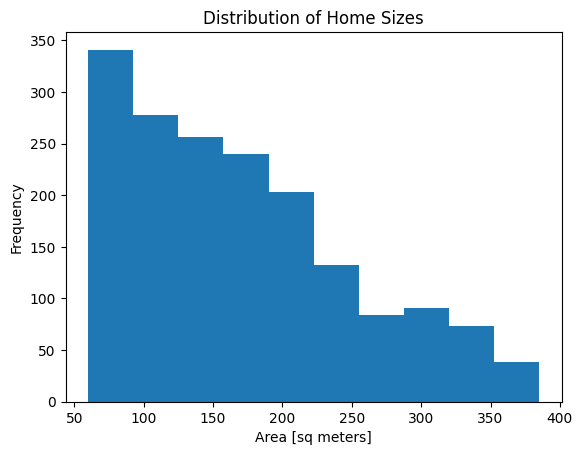

In [28]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df["area_m2"])

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Sizes");

Looking at our histogram, we can see that `"area_m2"` skews right. In other words, there are more houses at the lower end of the distribution (50–200m<sup>2</sup>) than at the higher end (250–400m<sup>2</sup>). That explains the difference between the mean and the median.

**Task 1.3.6:** Create a horizontal boxplot of `"area_m2"`. Make sure that the x-axis has the label `"Area [sq meters]"` and the plot has the title `"Distribution of Home Sizes"`. How is the distribution and its left skew represented differently here than in your histogram?

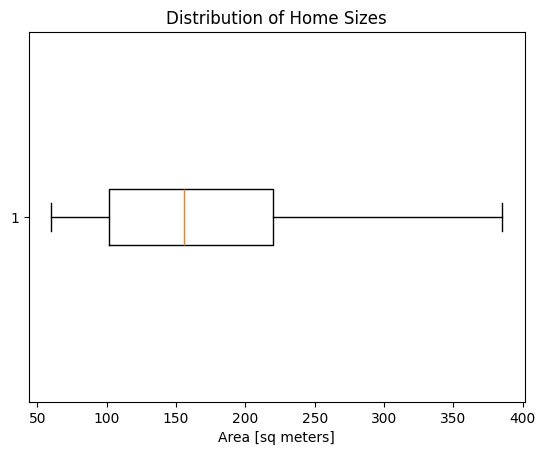

In [30]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df["area_m2"], vert=False)

# Add x-axis label
plt.xlabel("Area [sq meters]")

# Add title
plt.title("Distribution of Home Sizes");

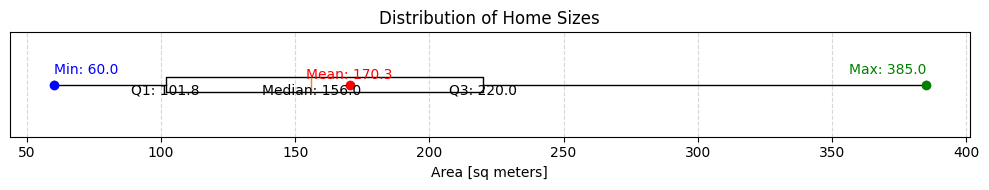

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate stats
data = df["area_m2"].dropna()  # drop NaNs if any
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
mean = data.mean()
min_val = data.min()
max_val = data.max()

# Create horizontal boxplot
plt.figure(figsize=(10, 2))
plt.boxplot(data, vert=False)

# Plot markers for summary stats
plt.scatter(mean, 1, color='red', label='Mean', zorder=3)
plt.scatter(min_val, 1, color='blue', label='Min', zorder=3)
plt.scatter(max_val, 1, color='green', label='Max', zorder=3)

# Add text labels (optional, for clarity)
plt.text(mean, 1.05, f"Mean: {mean:.1f}", ha='center', color='red')
plt.text(median, 0.9, f"Median: {median:.1f}", ha='center')
plt.text(q1, 0.9, f"Q1: {q1:.1f}", ha='center')
plt.text(q3, 0.9, f"Q3: {q3:.1f}", ha='center')
plt.text(min_val, 1.1, f"Min: {min_val:.1f}", ha='left', color='blue')
plt.text(max_val, 1.1, f"Max: {max_val:.1f}", ha='right', color='green')

# Axis label and title
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Home Sizes")
plt.yticks([])  # remove y-axis tick
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Task 1.3.7:** Create a histogram of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"`, the y-axis has the label `"Frequency"`, and the plot has the title `"Distribution of Home Prices"`. 

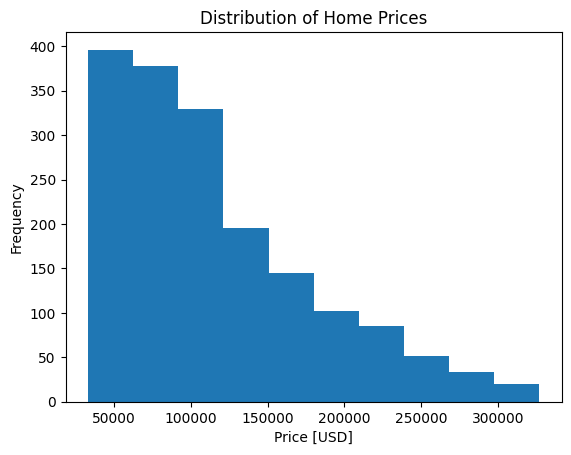

In [31]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df["price_usd"])

# Add x-axis label
plt.xlabel("Price [USD]")

# Add y-axis label
plt.ylabel("Frequency")

# Add title
plt.title("Distribution of Home Prices");

Looks like `"price_usd"` is even more skewed than `"area_m2"`. What does this bigger skew look like in a boxplot?

**Task 1.3.8:** Create a horizontal boxplot of `"price_usd"`. Make sure that the x-axis has the label `"Price [USD]"` and the plot has the title `"Distribution of Home Prices"`.

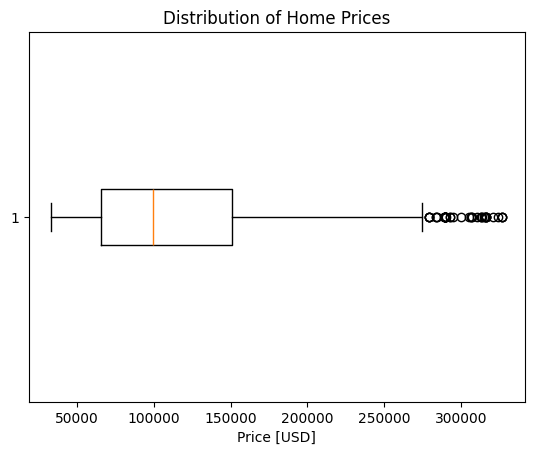

In [35]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df["price_usd"], vert=False)

# Add x-label axis
plt.xlabel("Price [USD]")

# Add y-label axis
plt.title("Distribution of Home Prices");

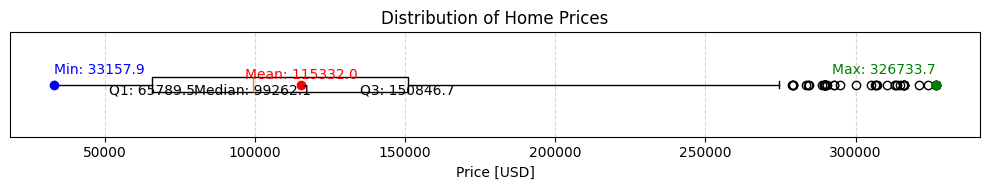

In [38]:
# Calculate stats
data = df["price_usd"].dropna()  # drop NaNs if any
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
mean = data.mean()
min_val = data.min()
max_val = data.max()

# Create horizontal boxplot
plt.figure(figsize=(10, 2))
plt.boxplot(data, vert=False)

# Plot markers for summary stats
plt.scatter(mean, 1, color='red', label='Mean', zorder=3)
plt.scatter(min_val, 1, color='blue', label='Min', zorder=3)
plt.scatter(max_val, 1, color='green', label='Max', zorder=3)

# Add text labels (optional, for clarity)
plt.text(mean, 1.05, f"Mean: {mean:.1f}", ha='center', color='red')
plt.text(median, 0.9, f"Median: {median:.1f}", ha='center')
plt.text(q1, 0.9, f"Q1: {q1:.1f}", ha='center')
plt.text(q3, 0.9, f"Q3: {q3:.1f}", ha='center')
plt.text(min_val, 1.1, f"Min: {min_val:.1f}", ha='left', color='blue')
plt.text(max_val, 1.1, f"Max: {max_val:.1f}", ha='right', color='green')

# Axis label and title
plt.xlabel("Price [USD]")
plt.title("Distribution of Home Prices")
plt.yticks([])  # remove y-axis tick
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()